# Part 1: EDA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [29]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [30]:
print("NBA Salary Analysis - Day 4: Advanced EDA")
print("=" * 50)

NBA Salary Analysis - Day 4: Advanced EDA


In [34]:
df = pd.read_csv('data/processed/master_nba_data.csv')
print(f"Dataset loaded: {len(df):,} player-seasons")

Dataset loaded: 3,360 player-seasons


In [36]:
current_season = df[df['Season'] == 2025].copy()
salary_data = current_season[current_season['Has_Salary_Data'] == True].copy()

In [38]:
print(f"2025 season: {len(current_season):,} players")
print(f"With salary data: {len(salary_data):,} players")

2025 season: 570 players
With salary data: 219 players


### Salary Distribution Analysis

In [41]:
def analyze_salary_distribution(salary_df):
    """Comprehensive salary distribution analysis"""
    print("\nSALARY DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    # Basic salary stats
    salary_stats = salary_df['Salary_Millions'].describe()
    print(f"Salary Statistics (2025 season):")
    print(f"  Min: ${salary_stats['min']:.1f}M")
    print(f"  25th percentile: ${salary_stats['25%']:.1f}M") 
    print(f"  Median: ${salary_stats['50%']:.1f}M")
    print(f"  75th percentile: ${salary_stats['75%']:.1f}M")
    print(f"  Max: ${salary_stats['max']:.1f}M")
    print(f"  Mean: ${salary_stats['mean']:.1f}M")
    print(f"  Std Dev: ${salary_stats['std']:.1f}M")
    
    # Salary tiers analysis
    print(f"\nSalary Tier Breakdown:")
    tier_counts = salary_df['Salary_Tier'].value_counts()
    for tier, count in tier_counts.items():
        pct = (count / len(salary_df)) * 100
        avg_salary = salary_df[salary_df['Salary_Tier'] == tier]['Salary_Millions'].mean()
        print(f"  {tier}: {count} players ({pct:.1f}%) - Avg: ${avg_salary:.1f}M")
    
    # Create salary distribution visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('NBA Salary Distribution Analysis (2025)', fontsize=16, fontweight='bold')
    
    # Histogram
    axes[0,0].hist(salary_df['Salary_Millions'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(salary_df['Salary_Millions'].median(), color='red', linestyle='--', label=f'Median: ${salary_df["Salary_Millions"].median():.1f}M')
    axes[0,0].axvline(salary_df['Salary_Millions'].mean(), color='orange', linestyle='--', label=f'Mean: ${salary_df["Salary_Millions"].mean():.1f}M')
    axes[0,0].set_xlabel('Salary (Millions)')
    axes[0,0].set_ylabel('Number of Players')
    axes[0,0].set_title('Salary Distribution')
    axes[0,0].legend()
    
    # Box plot by tier
    salary_df.boxplot(column='Salary_Millions', by='Salary_Tier', ax=axes[0,1])
    axes[0,1].set_title('Salary by Tier')
    axes[0,1].set_xlabel('Salary Tier')
    axes[0,1].set_ylabel('Salary (Millions)')
    
    # Log scale distribution (for better visibility)
    axes[1,0].hist(np.log10(salary_df['Salary_Millions']), bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,0].set_xlabel('Log10(Salary in Millions)')
    axes[1,0].set_ylabel('Number of Players') 
    axes[1,0].set_title('Salary Distribution (Log Scale)')
    
    # Career stage vs salary
    career_salary = salary_df.groupby('Career_Stage')['Salary_Millions'].mean().sort_values(ascending=False)
    axes[1,1].bar(career_salary.index, career_salary.values, color='coral')
    axes[1,1].set_xlabel('Career Stage')
    axes[1,1].set_ylabel('Average Salary (Millions)')
    axes[1,1].set_title('Average Salary by Career Stage')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return salary_stats

### Performance VS Salary Correlations

In [44]:
def analyze_performance_salary_correlations(salary_df):
    """Analyze correlations between performance metrics and salary"""
    print("\nPERFORMANCE vs SALARY CORRELATIONS")
    print("-" * 45)
    
    # Key performance metrics to analyze
    performance_metrics = ['PTS', 'TRB', 'AST', 'PER', 'VORP', 'BPM', 'WS', 'PPG', 'RPG', 'APG']
    
    # Calculate correlations
    correlations = {}
    for metric in performance_metrics:
        if metric in salary_df.columns:
            corr = salary_df[metric].corr(salary_df['Salary_Millions'])
            correlations[metric] = corr
            print(f"  {metric} vs Salary: {corr:.3f}")
    
    # Create correlation heatmap
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Correlation bar chart
    corr_df = pd.DataFrame(list(correlations.items()), columns=['Metric', 'Correlation'])
    corr_df = corr_df.sort_values('Correlation', ascending=True)
    
    axes[0].barh(corr_df['Metric'], corr_df['Correlation'], 
                color=['red' if x < 0 else 'green' for x in corr_df['Correlation']])
    axes[0].set_xlabel('Correlation with Salary')
    axes[0].set_title('Performance Metrics vs Salary Correlation')
    axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Scatter plot: PER vs Salary (usually strongest correlation)
    if 'PER' in salary_df.columns:
        axes[1].scatter(salary_df['PER'], salary_df['Salary_Millions'], alpha=0.6, color='blue')
        axes[1].set_xlabel('Player Efficiency Rating (PER)')
        axes[1].set_ylabel('Salary (Millions)')
        axes[1].set_title('PER vs Salary')
        
        # Add trend line
        z = np.polyfit(salary_df['PER'], salary_df['Salary_Millions'], 1)
        p = np.poly1d(z)
        axes[1].plot(salary_df['PER'], p(salary_df['PER']), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()
    
    return correlations

### Position-Based Analysis

In [47]:
def analyze_by_position(salary_df):
    """Comprehensive position-based analysis"""
    print("\nPOSITION-BASED ANALYSIS")
    print("-" * 30)
    
    position_analysis = salary_df.groupby('Pos').agg({
        'Salary_Millions': ['count', 'mean', 'median', 'std'],
        'PER': 'mean',
        'VORP': 'mean', 
        'Points_Per_Million': 'mean',
        'WinShares_Per_Million': 'mean'
    }).round(2)
    
    # Flatten column names
    position_analysis.columns = ['_'.join(col).strip() for col in position_analysis.columns]
    
    print("Position Summary:")
    print(position_analysis)
    
    # Create position analysis visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('NBA Analysis by Position (2025)', fontsize=16, fontweight='bold')
    
    # Average salary by position
    pos_salary = salary_df.groupby('Pos')['Salary_Millions'].mean().sort_values(ascending=False)
    axes[0,0].bar(pos_salary.index, pos_salary.values, color='lightblue')
    axes[0,0].set_ylabel('Average Salary (Millions)')
    axes[0,0].set_title('Average Salary by Position')
    
    # Player count by position
    pos_count = salary_df['Pos'].value_counts()
    axes[0,1].pie(pos_count.values, labels=pos_count.index, autopct='%1.1f%%', startangle=90)
    axes[0,1].set_title('Player Distribution by Position')
    
    # Efficiency by position
    if 'Points_Per_Million' in salary_df.columns:
        pos_efficiency = salary_df.groupby('Pos')['Points_Per_Million'].mean().sort_values(ascending=False)
        axes[1,0].bar(pos_efficiency.index, pos_efficiency.values, color='lightgreen')
        axes[1,0].set_ylabel('Points per Million Dollars')
        axes[1,0].set_title('Salary Efficiency by Position')
    
    # Box plot: Salary distribution by position
    salary_df.boxplot(column='Salary_Millions', by='Pos', ax=axes[1,1])
    axes[1,1].set_title('Salary Distribution by Position')
    axes[1,1].set_xlabel('Position')
    axes[1,1].set_ylabel('Salary (Millions)')
    
    plt.tight_layout()
    plt.show()
    
    return position_analysis

### Team Efficiency Analysis

In [130]:
def analyze_team_efficiency(df):
    """Analyze salary efficiency at the team level"""
    print("\nTEAM EFFICIENCY ANALYSIS")
    print("-" * 30)
    
    # EXCLUDE traded player aggregations
    real_teams_df = df[~df['Team_Clean'].isin(['2TM', '3TM', '4TM', 'TOT'])].copy()
    
    print(f"  Analyzing {len(real_teams_df)} players on actual teams")
    print(f"  Excluded {len(df) - len(real_teams_df)} traded player aggregations")
    
    # Team-level aggregations
    team_analysis = real_teams_df.groupby('Team_Clean').agg({
        'Salary_Millions': ['sum', 'mean', 'count'],
        'PTS': 'sum',
        'WS': 'sum',
        'VORP': 'sum',
        'Points_Per_Million': 'mean'
    }).round(2)
    
    # Flatten column names
    team_analysis.columns = ['_'.join(col).strip() for col in team_analysis.columns]
    
    # Add efficiency metrics
    team_analysis['Total_Payroll'] = team_analysis['Salary_Millions_sum']
    team_analysis['Points_Per_Payroll_Dollar'] = team_analysis['PTS_sum'] / team_analysis['Salary_Millions_sum']
    team_analysis['WS_Per_Payroll_Dollar'] = team_analysis['WS_sum'] / team_analysis['Salary_Millions_sum']
    
    # Filter out teams with insufficient data
    team_analysis = team_analysis[team_analysis['Salary_Millions_count'] >= 3]
    
    # Sort by efficiency
    team_efficiency = team_analysis.sort_values('Points_Per_Payroll_Dollar', ascending=False)
    
    print("Most Efficient Teams (Points per Payroll Dollar):")
    print(team_efficiency[['Total_Payroll', 'Points_Per_Payroll_Dollar', 'WS_Per_Payroll_Dollar']].head(10))
    
    return team_analysis

### Career Stage Impact Analysis

In [53]:
def analyze_career_stage_impact(salary_df):
    """Analyze salary and performance by career stage"""
    print("\nCAREER STAGE IMPACT ANALYSIS")
    print("-" * 35)
    
    career_analysis = salary_df.groupby('Career_Stage').agg({
        'Salary_Millions': ['count', 'mean', 'median'],
        'PER': 'mean',
        'VORP': 'mean',
        'Points_Per_Million': 'mean',
        'Age': 'mean'
    }).round(2)
    
    # Flatten column names
    career_analysis.columns = ['_'.join(col).strip() for col in career_analysis.columns]
    
    print("Career Stage Analysis:")
    print(career_analysis)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Career Stage Analysis (2025)', fontsize=16, fontweight='bold')
    
    # Average salary by career stage
    career_salary = salary_df.groupby('Career_Stage')['Salary_Millions'].mean().sort_values(ascending=False)
    axes[0,0].bar(career_salary.index, career_salary.values, color='orange', alpha=0.7)
    axes[0,0].set_ylabel('Average Salary (Millions)')
    axes[0,0].set_title('Average Salary by Career Stage')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Performance by career stage
    career_performance = salary_df.groupby('Career_Stage')['PER'].mean().sort_values(ascending=False)
    axes[0,1].bar(career_performance.index, career_performance.values, color='purple', alpha=0.7)
    axes[0,1].set_ylabel('Average PER')
    axes[0,1].set_title('Performance (PER) by Career Stage')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Efficiency by career stage
    if 'Points_Per_Million' in salary_df.columns:
        career_efficiency = salary_df.groupby('Career_Stage')['Points_Per_Million'].mean().sort_values(ascending=False)
        axes[1,0].bar(career_efficiency.index, career_efficiency.values, color='teal', alpha=0.7)
        axes[1,0].set_ylabel('Points per Million Dollars')
        axes[1,0].set_title('Salary Efficiency by Career Stage')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # Age distribution by career stage
    salary_df.boxplot(column='Age', by='Career_Stage', ax=axes[1,1])
    axes[1,1].set_title('Age Distribution by Career Stage')
    axes[1,1].set_xlabel('Career Stage')
    axes[1,1].set_ylabel('Age')
    
    plt.tight_layout()
    plt.show()
    
    return career_analysis

Starting comprehensive EDA...

SALARY DISTRIBUTION ANALYSIS
----------------------------------------
Salary Statistics (2025 season):
  Min: $0.7M
  25th percentile: $3.2M
  Median: $10.0M
  75th percentile: $25.6M
  Max: $59.6M
  Mean: $16.4M
  Std Dev: $15.9M

Salary Tier Breakdown:
  Rookie/Min: 76 players (34.7%) - Avg: $2.8M
  Role Player: 62 players (28.3%) - Avg: $9.9M
  Superstar: 48 players (21.9%) - Avg: $42.8M
  Star: 33 players (15.1%) - Avg: $21.8M


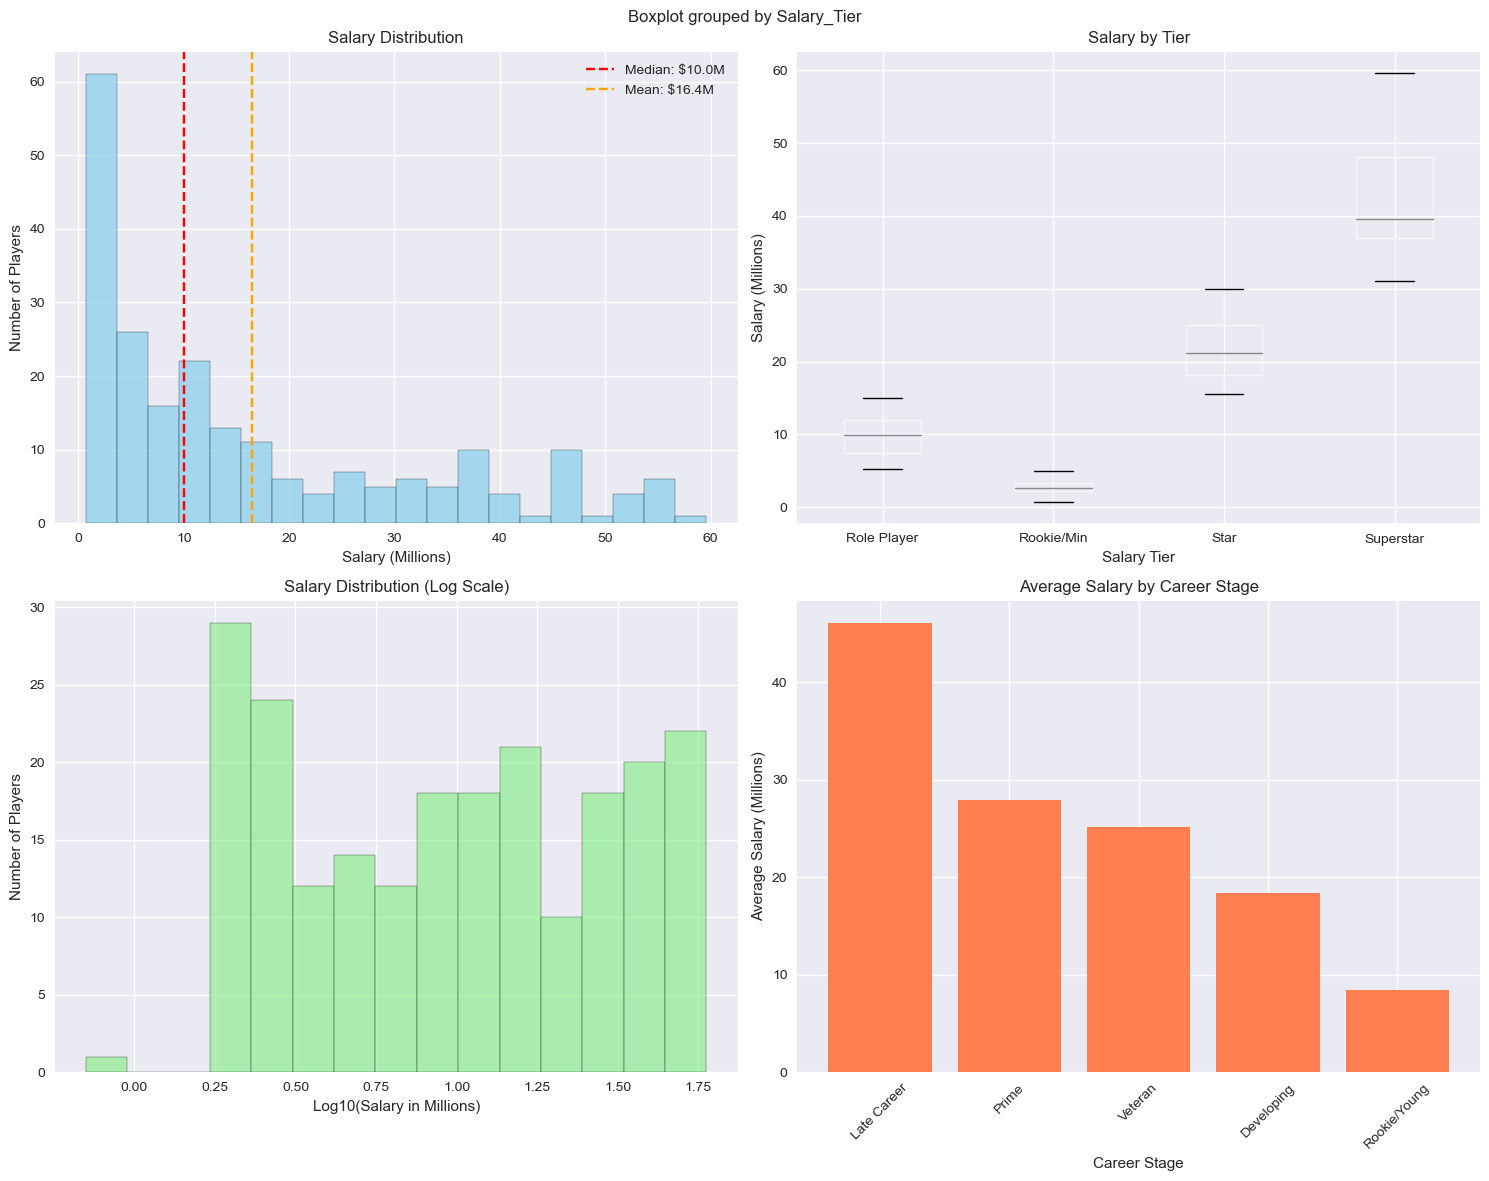


PERFORMANCE vs SALARY CORRELATIONS
---------------------------------------------
  PTS vs Salary: 0.755
  TRB vs Salary: 0.464
  AST vs Salary: 0.635
  PER vs Salary: 0.682
  VORP vs Salary: 0.680
  BPM vs Salary: 0.653
  WS vs Salary: 0.614
  PPG vs Salary: 0.850
  RPG vs Salary: 0.536
  APG vs Salary: 0.702


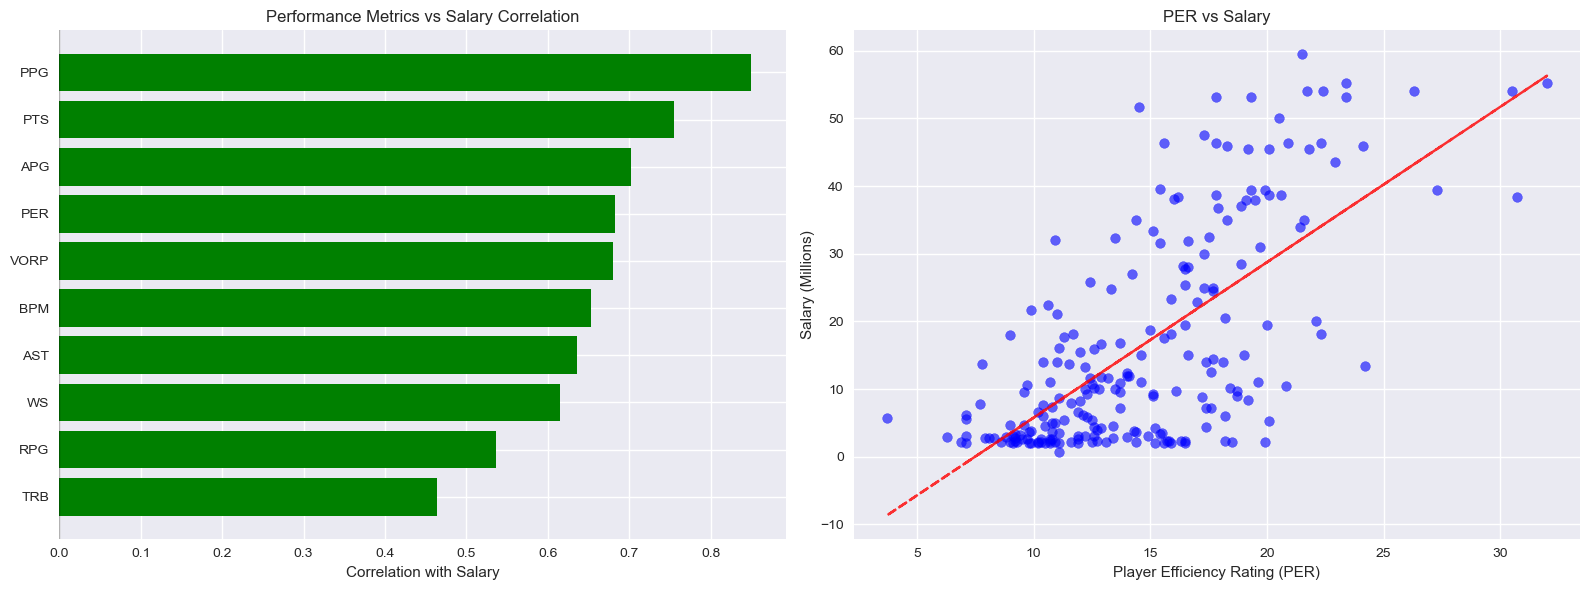


POSITION-BASED ANALYSIS
------------------------------
Position Summary:
     Salary_Millions_count  Salary_Millions_mean  Salary_Millions_median  \
Pos                                                                        
C                       32                 17.81                   11.40   
PF                      43                 18.89                   12.50   
PG                      37                 20.52                   10.20   
SF                      51                 15.28                   10.00   
SG                      56                 12.12                    5.91   

     Salary_Millions_std  PER_mean  VORP_mean  Points_Per_Million_mean  \
Pos                                                                      
C                  16.50     19.13       1.72                    81.91   
PF                 17.75     14.56       0.91                    57.67   
PG                 18.10     15.58       1.33                    87.29   
SF                 14.6

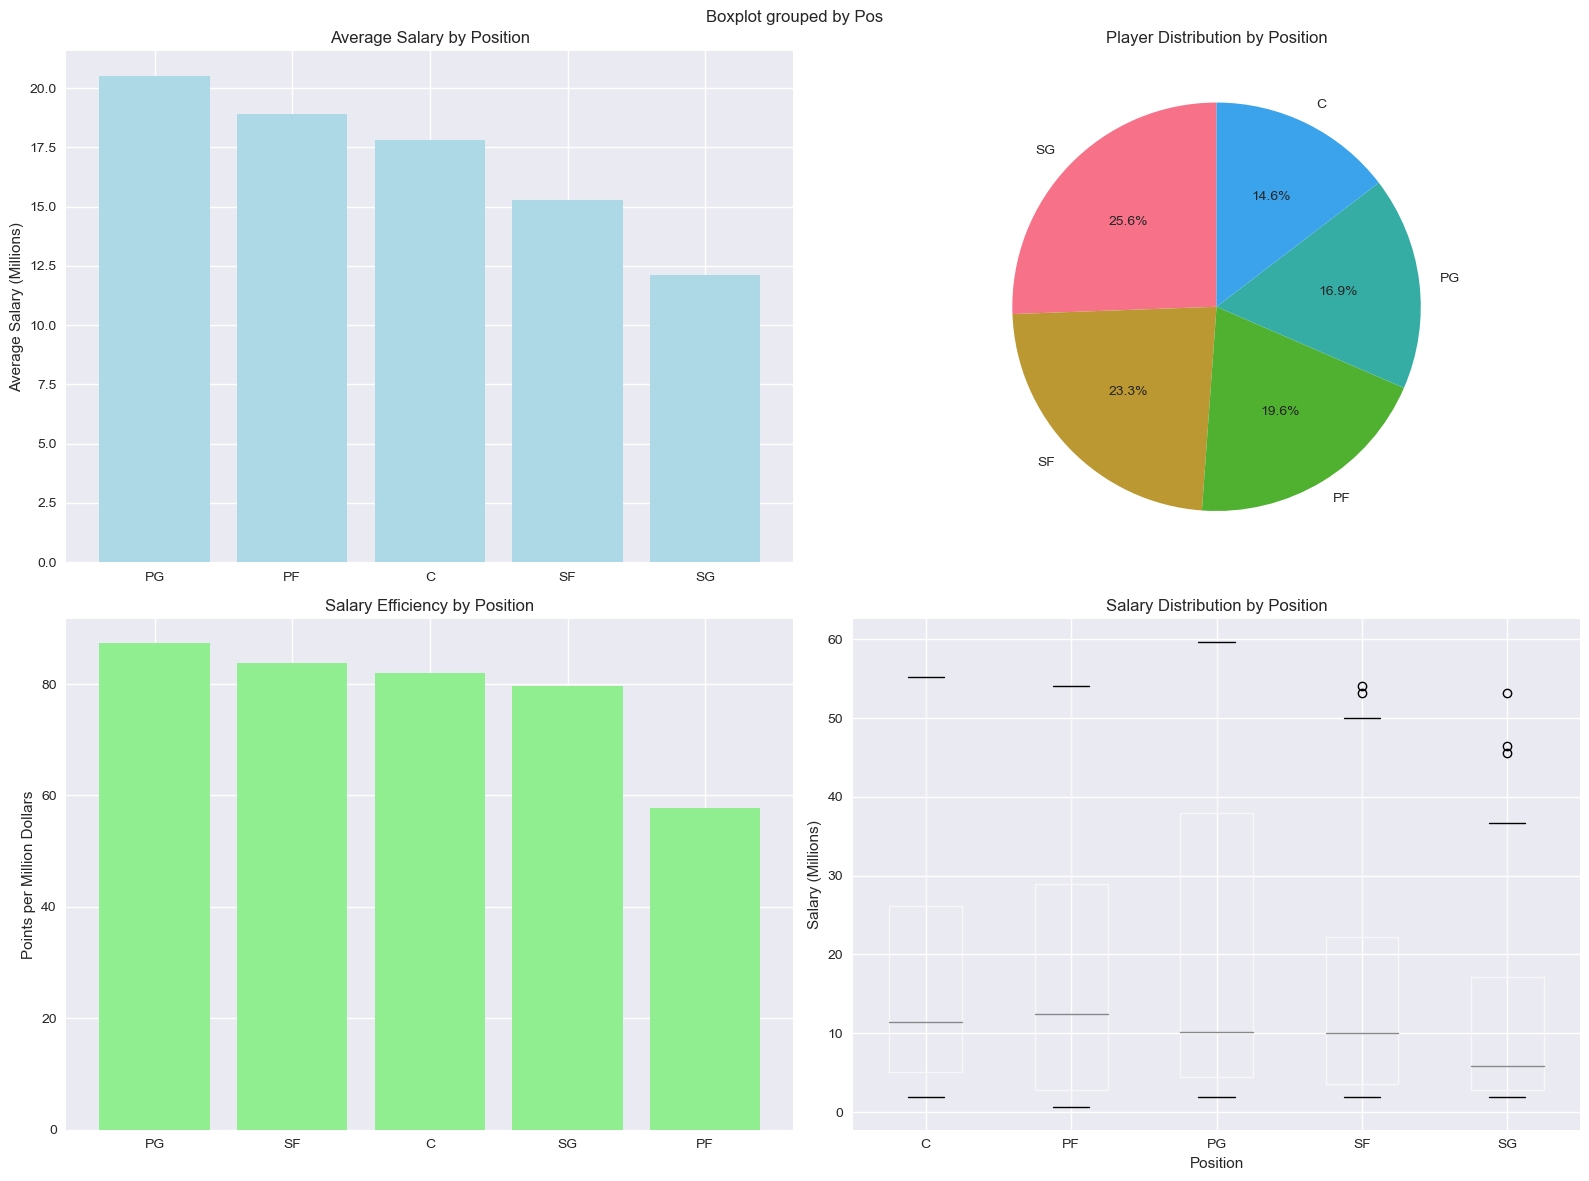


TEAM EFFICIENCY ANALYSIS
------------------------------
Most Efficient Teams (Points per Payroll Dollar):
            Total_Payroll  Points_Per_Payroll_Dollar  WS_Per_Payroll_Dollar
Team_Clean                                                                 
LAL                 31.47                  75.945345               0.365427
WAS                 74.90                  75.206943               0.082777
DAL                 39.93                  73.378412               0.232908
SAS                 70.44                  72.984100               0.181715
UTA                 74.55                  62.669349               0.065728
POR                 69.66                  62.273902               0.274189
MIA                 78.36                  59.545687               0.289689
MEM                111.98                  55.108055               0.285765
CHI                 45.38                  53.591891               0.185104
HOU                112.24                  52.592659     

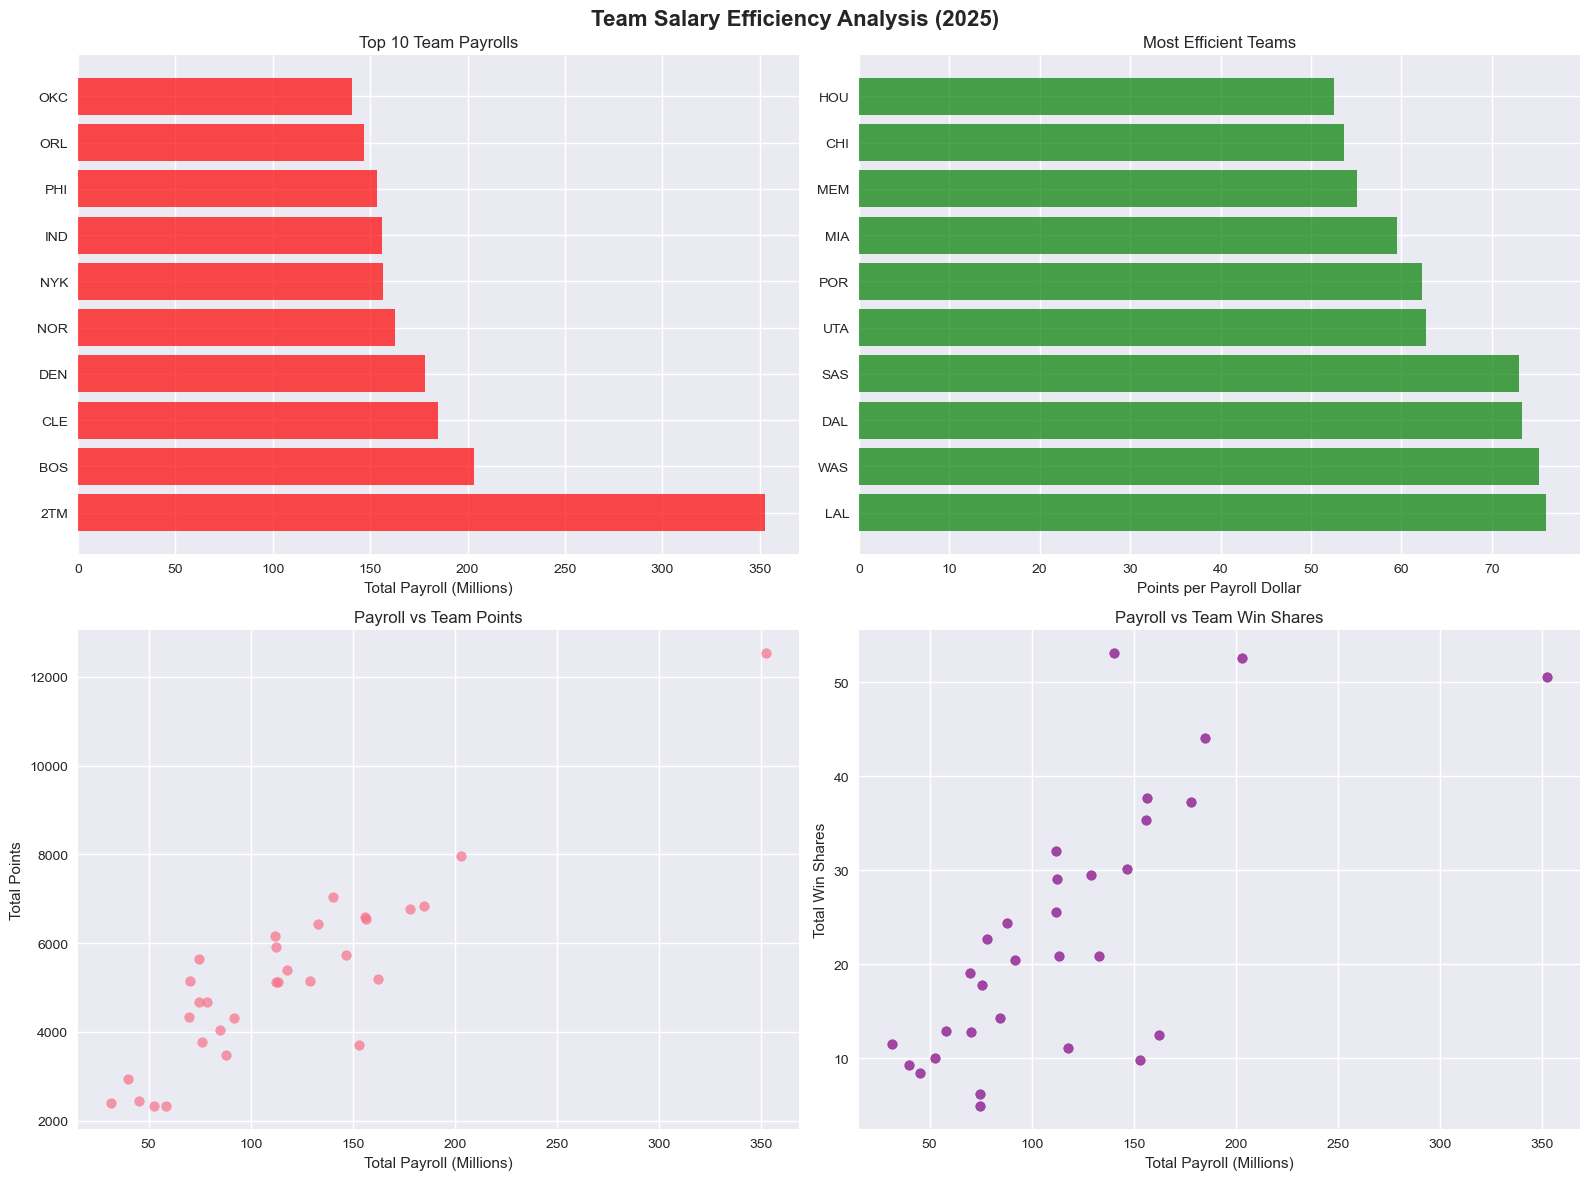


CAREER STAGE IMPACT ANALYSIS
-----------------------------------
Career Stage Analysis:
              Salary_Millions_count  Salary_Millions_mean  \
Career_Stage                                                
Developing                       76                 18.42   
Late Career                       3                 46.10   
Prime                            33                 27.91   
Rookie/Young                     93                  8.47   
Veteran                          14                 25.18   

              Salary_Millions_median  PER_mean  VORP_mean  \
Career_Stage                                                
Developing                     13.96     15.56       1.24   
Late Career                    54.13     20.53       3.03   
Prime                          22.41     17.12       1.86   
Rookie/Young                    4.01     12.68       0.22   
Veteran                        19.14     15.61       1.11   

              Points_Per_Million_mean  Age_mean  
Caree

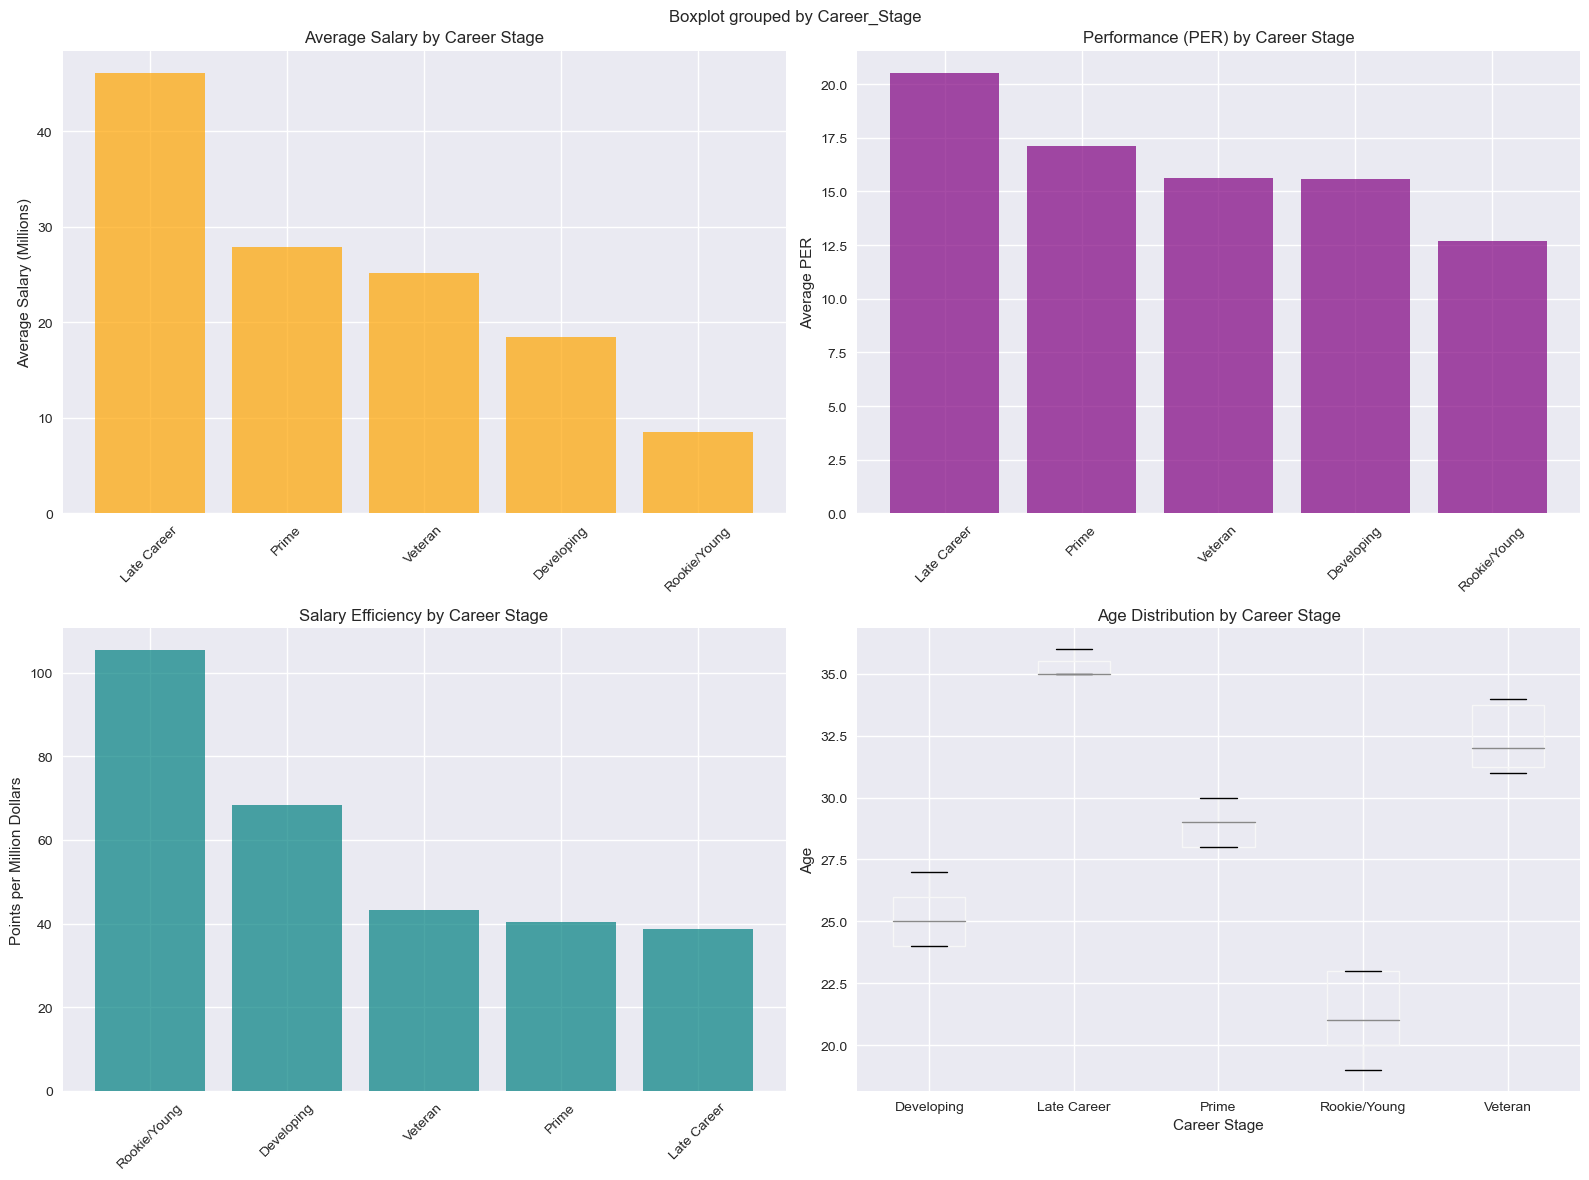


Day 4 Part 1 Complete
Key insights discovered and visualized.


In [55]:
if __name__ == "__main__":
    # Run all analyses
    print("Starting comprehensive EDA...")
    
    # 1. Salary Distribution
    salary_stats = analyze_salary_distribution(salary_data)
    
    # 2. Performance vs Salary Correlations
    correlations = analyze_performance_salary_correlations(salary_data)
    
    # 3. Position Analysis
    position_analysis = analyze_by_position(salary_data)
    
    # 4. Team Efficiency
    team_analysis = analyze_team_efficiency(salary_data)
    
    # 5. Career Stage Analysis
    career_analysis = analyze_career_stage_impact(salary_data)
    
    print("\nDay 4 Part 1 Complete")
    print("Key insights discovered and visualized.")

# Part 2: Feature Engineering

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [66]:
print(" NBA Salary Analysis - Day 4: Advanced Feature Engineering")
print("=" * 60)

 NBA Salary Analysis - Day 4: Advanced Feature Engineering


In [68]:
df = pd.read_csv('data/processed/master_nba_data.csv')
print(f"Dataset loaded: {len(df):,} player-seasons")

Dataset loaded: 3,360 player-seasons


In [70]:
def create_advanced_efficiency_metrics(df):
    """Create sophisticated efficiency and value metrics"""
    print("\nCREATING ADVANCED EFFICIENCY METRICS")
    print("-" * 45)
    
    # Ensure we have the required columns
    df = df.copy()
    
    # 1. Comprehensive Performance Score
    print("  Creating Composite Performance Score...")
    
    # Normalize key metrics (0-100 scale)
    performance_metrics = ['PER', 'VORP', 'BPM', 'WS']
    for metric in performance_metrics:
        if metric in df.columns:
            # Create percentile rankings
            df[f'{metric}_Percentile'] = df.groupby('Season')[metric].rank(pct=True) * 100
    
    # Composite Performance Score (weighted average)
    weights = {'PER': 0.3, 'VORP': 0.25, 'BPM': 0.25, 'WS': 0.2}
    df['Performance_Score'] = 0
    
    for metric, weight in weights.items():
        if f'{metric}_Percentile' in df.columns:
            df['Performance_Score'] += df[f'{metric}_Percentile'] * weight
    
    # 2. Position-Adjusted Metrics
    print("  Creating Position-Adjusted Metrics...")
    
    # Adjust performance by position (centers vs guards have different roles)
    position_adjustments = {
        'PG': {'AST': 1.5, 'STL': 1.3, 'PTS': 1.0, 'TRB': 0.7, 'BLK': 0.5},
        'SG': {'PTS': 1.3, 'STL': 1.2, 'AST': 0.8, 'TRB': 0.8, 'BLK': 0.6},
        'SF': {'PTS': 1.1, 'TRB': 1.0, 'AST': 1.0, 'STL': 1.0, 'BLK': 0.8},
        'PF': {'TRB': 1.4, 'BLK': 1.2, 'PTS': 0.9, 'AST': 0.7, 'STL': 0.8},
        'C': {'TRB': 1.5, 'BLK': 1.5, 'PTS': 0.8, 'AST': 0.5, 'STL': 0.6}
    }
    
    df['Position_Adjusted_Score'] = 0
    for pos, adjustments in position_adjustments.items():
        mask = df['Pos'] == pos
        for stat, multiplier in adjustments.items():
            if stat in df.columns:
                df.loc[mask, 'Position_Adjusted_Score'] += (
                    df.loc[mask, stat] * multiplier / df.loc[mask, 'G']
                )
    
    # 3. Age-Adjusted Performance
    print("  Creating Age-Adjusted Performance...")
    
    # Players peak around 27-28, adjust for age curve
    def age_adjustment_factor(age):
        if pd.isna(age):
            return 1.0
        if age <= 23:
            return 0.85  # Young players still developing
        elif age <= 26:
            return 0.95  # Entering prime
        elif age <= 29:
            return 1.0   # Prime years
        elif age <= 32:
            return 0.95  # Early decline
        else:
            return 0.85  # Later career
    
    df['Age_Adjustment'] = df['Age'].apply(age_adjustment_factor)
    df['Age_Adjusted_Performance'] = df['Performance_Score'] * df['Age_Adjustment']
    
    # 4. Playing Time Impact
    print("  Creating Playing Time Metrics...")
    
    # Adjust for playing time reliability
    df['Games_Played_Pct'] = df['G'] / df.groupby('Season')['G'].transform('max')
    df['Heavy_Minutes'] = (df['MPG'] > 30).astype(int)
    df['Starter_Flag'] = (df['GS'] / df['G'] > 0.7).fillna(0).astype(int)
    
    # Durability score (games played + consistent minutes)
    df['Durability_Score'] = (
        df['Games_Played_Pct'] * 0.6 +
        (df['MPG'] / 40) * 0.4  # Normalize to 40 minutes
    ).clip(0, 1)
    
    print(f" Created {len([col for col in df.columns if 'Score' in col or 'Adjusted' in col])} new metrics")
    return df

### Market Value Calculations

In [73]:
def calculate_market_value(df):
    """Calculate predicted market value for players"""
    print("\nCALCULATING MARKET VALUE")
    print("-" * 30)
    
    # Focus on players with salary data for training
    salary_data = df[df['Has_Salary_Data'] == True].copy()
    
    if len(salary_data) < 50:
        print(" Insufficient salary data for reliable modeling")
        return df
    
    print(f"  Training on {len(salary_data)} players with salary data...")
    
    # Features for salary prediction
    salary_features = [
        'Performance_Score', 'Age', 'Position_Adjusted_Score', 
        'PER', 'VORP', 'BPM', 'WS', 'PPG', 'RPG', 'APG',
        'Games_Played_Pct', 'Durability_Score', 'Starter_Flag'
    ]
    
    # Remove any features not in the dataset
    available_features = [f for f in salary_features if f in salary_data.columns]
    print(f"  Using {len(available_features)} features for prediction")
    
    # Prepare training data
    X = salary_data[available_features].fillna(0)
    y = salary_data['Salary_Millions']
    
    # Train salary prediction model
    print("  Training salary prediction model...")
    
    # Try Random Forest (handles non-linear relationships)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    # Predict salaries for all players
    X_all = df[available_features].fillna(0)
    df['Predicted_Salary_Millions'] = rf_model.predict(X_all)
    
    # Calculate market value metrics
    df['Salary_Premium'] = np.nan  # Will only calculate for players with actual salaries
    df['Value_Rating'] = np.nan
    
    # For players with actual salaries
    mask = df['Has_Salary_Data'] == True
    if mask.sum() > 0:
        # Salary premium (positive = overpaid, negative = underpaid)
        df.loc[mask, 'Salary_Premium'] = (
            (df.loc[mask, 'Salary_Millions'] - df.loc[mask, 'Predicted_Salary_Millions']) /
            df.loc[mask, 'Predicted_Salary_Millions']
        ) * 100
        
        # Value rating (performance per dollar)
        df.loc[mask, 'Value_Rating'] = (
            df.loc[mask, 'Performance_Score'] / df.loc[mask, 'Salary_Millions']
        )
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': available_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("  Most important salary factors:")
    for _, row in feature_importance.head(5).iterrows():
        print(f"    {row['Feature']}: {row['Importance']:.3f}")
    
    return df

### Contract Status Classifications

In [77]:
def create_contract_classifications(df):
    """Create contract status and value classifications"""
    print("\nCREATING CONTRACT CLASSIFICATIONS")
    print("-" * 40)
    
    # 1. Contract Value Categories
    print("  Creating contract value categories...")
    
    # Define salary brackets (based on 2025 NBA salary structure)
    salary_brackets = {
        'Minimum': (0, 3),
        'Rookie_Scale': (3, 8),
        'Mid_Level': (8, 20),
        'Near_Max': (20, 35),
        'Max_Contract': (35, 100)
    }
    
    def classify_contract_type(salary):
        if pd.isna(salary):
            return 'Unknown'
        for bracket, (min_sal, max_sal) in salary_brackets.items():
            if min_sal <= salary < max_sal:
                return bracket
        return 'Super_Max'
    
    df['Contract_Type'] = df['Salary_Millions'].apply(classify_contract_type)
    
    # 2. Value Classifications
    print("  Creating value classifications...")
    
    # For players with salary data, classify their value
    def classify_value(row):
        if not row['Has_Salary_Data']:
            return 'No_Salary_Data'
        
        # Use multiple criteria
        premium = row['Salary_Premium'] if not pd.isna(row['Salary_Premium']) else 0
        efficiency = row['Points_Per_Million'] if not pd.isna(row['Points_Per_Million']) else 0
        performance = row['Performance_Score'] if not pd.isna(row['Performance_Score']) else 50
        
        # Excellent value: high performance, low salary premium
        if premium < -20 and performance > 70:
            return 'Excellent_Value'
        elif premium < -10 and performance > 60:
            return 'Good_Value'
        elif -10 <= premium <= 10 and performance > 50:
            return 'Fair_Value'
        elif premium > 10 and performance < 40:
            return 'Poor_Value'
        elif premium > 20:
            return 'Overpaid'
        else:
            return 'Average_Value'
    
    df['Value_Classification'] = df.apply(classify_value, axis=1)
    
    # 3. Contract Risk Assessment
    print("  Creating contract risk assessments...")
    
    def assess_contract_risk(row):
        if not row['Has_Salary_Data']:
            return 'No_Data'
        
        age = row['Age'] if not pd.isna(row['Age']) else 25
        durability = row['Durability_Score'] if not pd.isna(row['Durability_Score']) else 0.5
        performance = row['Performance_Score'] if not pd.isna(row['Performance_Score']) else 50
        
        risk_score = 0
        
        # Age risk
        if age > 32:
            risk_score += 3
        elif age > 29:
            risk_score += 1
        elif age < 22:
            risk_score += 1  # Unproven young players
        
        # Durability risk
        if durability < 0.6:
            risk_score += 2
        elif durability < 0.8:
            risk_score += 1
        
        # Performance risk
        if performance < 30:
            risk_score += 2
        elif performance < 50:
            risk_score += 1
        
        # Classify risk
        if risk_score <= 1:
            return 'Low_Risk'
        elif risk_score <= 3:
            return 'Medium_Risk'
        else:
            return 'High_Risk'
    
    df['Contract_Risk'] = df.apply(assess_contract_risk, axis=1)
    
    # Print distribution
    if 'Value_Classification' in df.columns:
        print("  Value classification distribution:")
        value_dist = df['Value_Classification'].value_counts()
        for value, count in value_dist.items():
            print(f"    {value}: {count}")
    
    return df

### Team Context Features

In [126]:
def create_team_context_features(df):
    """Create features based on team context - FIXED VERSION"""
    print("\nCREATING TEAM CONTEXT FEATURES (FIXED)")
    print("-" * 40)
    
    # Create a copy to work with
    df_fixed = df.copy()
    
    # 1. Team Salary Distribution Features (REAL TEAMS ONLY)
    print("  Calculating team salary context (excluding traded player totals)...")
    
    # Filter for real teams for aggregation
    real_teams_data = df_fixed[~df_fixed['Team_Clean'].isin(['2TM', '3TM', '4TM', 'TOT'])]
    
    # Team aggregations by season (real teams only)
    team_stats = real_teams_data.groupby(['Team_Clean', 'Season']).agg({
        'Salary_Millions': ['sum', 'mean', 'count'],
        'Performance_Score': 'mean',
        'WS': 'sum',
        'VORP': 'sum'
    }).round(2)
    
    # Flatten column names
    team_stats.columns = ['_'.join(col).strip() for col in team_stats.columns]
    team_stats = team_stats.reset_index()
    
    # For traded players (2TM, 3TM, etc.), we need to handle them differently
    # Option 1: Set their team context to league averages
    # Option 2: Exclude them from team-based features
    
    # Merge back to main dataframe (will only match real teams)
    df_fixed = df_fixed.merge(
        team_stats[['Team_Clean', 'Season', 'Salary_Millions_sum', 'Salary_Millions_mean']],
        on=['Team_Clean', 'Season'],
        how='left',
        suffixes=('', '_team')
    )
    
    # Handle traded players - set to league averages
    league_avg_payroll = team_stats.groupby('Season')['Salary_Millions_sum'].mean()
    league_avg_salary = team_stats.groupby('Season')['Salary_Millions_mean'].mean()
    
    for season in df_fixed['Season'].unique():
        traded_mask = (
            (df_fixed['Season'] == season) & 
            (df_fixed['Team_Clean'].isin(['2TM', '3TM', '4TM', 'TOT']))
        )
        
        if season in league_avg_payroll.index:
            df_fixed.loc[traded_mask, 'Salary_Millions_sum'] = league_avg_payroll[season]
            df_fixed.loc[traded_mask, 'Salary_Millions_mean'] = league_avg_salary[season]
    
    # Calculate player's salary relative to team
    df_fixed['Salary_Pct_of_Team'] = (
        df_fixed['Salary_Millions'] / df_fixed['Salary_Millions_sum'] * 100
    ).fillna(0)
    
    # Salary rank within team (for real teams only)
    def assign_team_rank(group):
        if group['Team_Clean'].iloc[0] in ['2TM', '3TM', '4TM', 'TOT']:
            return pd.Series([999] * len(group), index=group.index)  # Default rank for traded players
        else:
            return group['Salary_Millions'].rank(ascending=False, method='dense')
    
    df_fixed['Team_Salary_Rank'] = df_fixed.groupby(['Team_Clean', 'Season']).apply(assign_team_rank).reset_index(level=[0,1], drop=True)
    
    # 2. Role Classification (updated for traded players)
    print("  Classifying player roles...")
    
    def classify_team_role_fixed(row):
        # For traded players, classify based on salary only
        if row['Team_Clean'] in ['2TM', '3TM', '4TM', 'TOT']:
            salary = row['Salary_Millions']
            if salary > 30:
                return 'Star_Player'
            elif salary > 15:
                return 'Key_Player'
            elif salary > 8:
                return 'Rotation_Player'
            else:
                return 'Bench_Player'
        
        # For real teams, use full logic
        salary_pct = row['Salary_Pct_of_Team']
        salary_rank = row['Team_Salary_Rank']
        starter = row['Starter_Flag'] if 'Starter_Flag' in row and not pd.isna(row['Starter_Flag']) else 0
        
        if salary_pct > 25:
            return 'Franchise_Player'
        elif salary_pct > 15 or salary_rank <= 2:
            return 'Star_Player'
        elif salary_pct > 8 or salary_rank <= 5:
            return 'Key_Player'
        elif starter:
            return 'Starter'
        elif salary_pct > 2:
            return 'Rotation_Player'
        else:
            return 'Bench_Player'
    
    df_fixed['Team_Role'] = df_fixed.apply(classify_team_role_fixed, axis=1)
    
    # 3. Market Context (same as before)
    print("  Adding market context...")
    
    # League-wide salary percentiles by season
    df_fixed['League_Salary_Percentile'] = df_fixed.groupby('Season')['Salary_Millions'].rank(pct=True) * 100
    df_fixed['League_Salary_Percentile'] = df_fixed['League_Salary_Percentile'].fillna(0)
    
    # Position market value
    position_salary_medians = df_fixed.groupby(['Pos', 'Season'])['Salary_Millions'].median().reset_index()
    position_salary_medians.columns = ['Pos', 'Season', 'Position_Market_Salary']
    
    df_fixed = df_fixed.merge(position_salary_medians, on=['Pos', 'Season'], how='left')
    
    # Salary premium vs position market
    df_fixed['Position_Salary_Premium'] = (
        (df_fixed['Salary_Millions'] - df_fixed['Position_Market_Salary']) / 
        df_fixed['Position_Market_Salary'] * 100
    ).fillna(0)
    
    print(f"  Added team context features (properly handled traded players)")
    return df_fixed


### Predictive Features

In [83]:
def create_predictive_features(df):
    """Create features for predicting future performance and value"""
    print("\nCREATING PREDICTIVE FEATURES")
    print("-" * 30)
    
    # 1. Career Trajectory Features
    print("  Calculating career trajectories...")
    
    # Sort by player and season for trajectory calculations
    df = df.sort_values(['Player_Clean', 'Season'])
    
    # Performance trends (last 2 seasons)
    for metric in ['PER', 'VORP', 'Performance_Score']:
        if metric in df.columns:
            # Year-over-year change
            df[f'{metric}_YoY_Change'] = df.groupby('Player_Clean')[metric].diff()
            
            # 2-year trend (slope)
            df[f'{metric}_Trend'] = df.groupby('Player_Clean')[metric].rolling(
                window=2, min_periods=2
            ).apply(lambda x: (x.iloc[-1] - x.iloc[0]) if len(x) >= 2 else 0).reset_index(0, drop=True)
    
    # 2. Experience Features
    print("  Adding experience features...")
    
    # Years in league (proxy)
    df['Years_Experience'] = df.groupby('Player_Clean').cumcount() + 1
    
    # Career games and minutes
    df['Career_Games'] = df.groupby('Player_Clean')['G'].cumsum()
    df['Career_Minutes'] = df.groupby('Player_Clean')['MP'].cumsum()
    
    # 3. Consistency Metrics
    print("  Calculating consistency metrics...")
    
    # Performance consistency (CV of key stats over career)
    for metric in ['PER', 'PPG', 'Performance_Score']:
        if metric in df.columns:
            # Rolling coefficient of variation (last 3 seasons)
            df[f'{metric}_Consistency'] = df.groupby('Player_Clean')[metric].rolling(
                window=3, min_periods=2
            ).apply(lambda x: x.std() / x.mean() if x.mean() != 0 else 0).reset_index(0, drop=True)
    
    # 4. Peak Performance Indicators
    print("  Identifying peak performance indicators...")
    
    # Career highs and current performance relative to career high
    career_highs = df.groupby('Player_Clean')[['PER', 'VORP', 'Performance_Score']].cummax()
    
    for metric in ['PER', 'VORP', 'Performance_Score']:
        if metric in df.columns:
            df[f'{metric}_Career_High'] = career_highs[metric]
            df[f'{metric}_Pct_of_Career_High'] = (
                df[metric] / df[f'{metric}_Career_High'] * 100
            ).fillna(0)
    
    # 5. Contract Context Predictors
    print("  Adding contract timing features...")
    
    # Simulate contract year effects (players often perform better in contract years)
    # Note: This is simplified - in reality you'd need actual contract end dates
    df['Potential_Contract_Year'] = (
        (df['Age'] >= 24) & (df['Age'] <= 30) & 
        (df['Years_Experience'].isin([4, 5, 8, 9]))  # Typical contract timing
    ).astype(int)
    
    # Age-based value predictions
    def predict_age_arc(age):
        if pd.isna(age):
            return 1.0
        # Typical NBA age curve
        if age <= 23:
            return 1.1  # Still improving
        elif age <= 27:
            return 1.05  # Entering prime
        elif age <= 29:
            return 1.0   # Prime
        elif age <= 31:
            return 0.95  # Early decline
        elif age <= 33:
            return 0.9   # Noticeable decline
        else:
            return 0.8   # Significant decline
    
    df['Age_Arc_Multiplier'] = df['Age'].apply(predict_age_arc)
    df['Projected_Performance'] = df['Performance_Score'] * df['Age_Arc_Multiplier']
    
    print(f"Added predictive features")
    return df

### Feature Summary

In [86]:
def create_feature_summary(df):
    """Create summary of all engineered features"""
    print("\nFEATURE ENGINEERING SUMMARY")
    print("-" * 35)
    
    # Categorize features
    feature_categories = {
        'Basic_Stats': ['PTS', 'TRB', 'AST', 'PPG', 'RPG', 'APG'],
        'Advanced_Stats': ['PER', 'VORP', 'BPM', 'WS'],
        'Efficiency_Metrics': [col for col in df.columns if 'Per_Million' in col or 'Efficiency' in col],
        'Performance_Scores': [col for col in df.columns if 'Score' in col],
        'Contract_Features': [col for col in df.columns if 'Salary' in col or 'Contract' in col or 'Value' in col],
        'Team_Context': [col for col in df.columns if 'Team' in col or 'Role' in col],
        'Predictive_Features': [col for col in df.columns if 'Trend' in col or 'Change' in col or 'Projected' in col],
        'Career_Features': [col for col in df.columns if 'Career' in col or 'Experience' in col]
    }
    
    print("Feature categories created:")
    total_features = 0
    for category, features in feature_categories.items():
        existing_features = [f for f in features if f in df.columns]
        print(f"  {category}: {len(existing_features)} features")
        total_features += len(existing_features)
    
    print(f"\nTotal engineered features: {total_features}")
    print(f"Original columns: {len(df.columns) - total_features}")
    print(f"Final dataset: {len(df.columns)} columns")
    
    # Save feature categories for reference
    feature_reference = {
        'total_features': len(df.columns),
        'engineered_features': total_features,
        'categories': {cat: [f for f in features if f in df.columns] 
                      for cat, features in feature_categories.items()}
    }
    
    return df, feature_reference

In [88]:
def main():
    """Execute all feature engineering steps"""
    print("Starting comprehensive feature engineering...")
    
    # Load data
    df = pd.read_csv('data/processed/master_nba_data.csv')
    
    # Step 1: Advanced Efficiency Metrics
    df = create_advanced_efficiency_metrics(df)
    
    # Step 2: Market Value Calculations
    df = calculate_market_value(df)
    
    # Step 3: Contract Classifications
    df = create_contract_classifications(df)
    
    # Step 4: Team Context Features
    df = create_team_context_features(df)
    
    # Step 5: Predictive Features
    df = create_predictive_features(df)
    
    # Step 6: Feature Summary
    df, feature_reference = create_feature_summary(df)
    
    # Save enhanced dataset
    df.to_csv('data/processed/master_nba_data_engineered.csv', index=False)
    
    # Save feature reference
    import json
    with open('data/processed/feature_reference.json', 'w') as f:
        json.dump(feature_reference, f, indent=2)
    
    print(f"\n Feature engineering complete!")
    print(f"Enhanced dataset saved: {len(df)} rows, {len(df.columns)} columns")
    
    return df

if __name__ == "__main__":
    df_enhanced = main() 

Starting comprehensive feature engineering...

CREATING ADVANCED EFFICIENCY METRICS
---------------------------------------------
  Creating Composite Performance Score...
  Creating Position-Adjusted Metrics...
  Creating Age-Adjusted Performance...
  Creating Playing Time Metrics...
 Created 4 new metrics

CALCULATING MARKET VALUE
------------------------------
  Training on 219 players with salary data...
  Using 13 features for prediction
  Training salary prediction model...
  Most important salary factors:
    PPG: 0.571
    Position_Adjusted_Score: 0.195
    Age: 0.083
    Performance_Score: 0.023
    Starter_Flag: 0.023

CREATING CONTRACT CLASSIFICATIONS
----------------------------------------
  Creating contract value categories...
  Creating value classifications...
  Creating contract risk assessments...
  Value classification distribution:
    No_Salary_Data: 3141
    Average_Value: 98
    Fair_Value: 61
    Good_Value: 25
    Poor_Value: 13
    Excellent_Value: 12
    Ove

# Part 3: Insights Generation

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [96]:
print("NBA Salary Analysis - Key Insights Generation")
print("=" * 55)

# Load the enhanced dataset
df = pd.read_csv('data/processed/master_nba_data_engineered.csv')
print(f"Enhanced dataset loaded: {len(df):,} player-seasons")

# Focus on 2025 season with salary data
current_season = df[(df['Season'] == 2025) & (df['Has_Salary_Data'] == True)].copy()
print(f"2025 players with salary data: {len(current_season):,}")

NBA Salary Analysis - Key Insights Generation
Enhanced dataset loaded: 3,360 player-seasons
2025 players with salary data: 219


### Top Bargain Contracts

In [140]:
def identify_bargain_contracts(df):
    """Identify the best value contracts in the NBA"""
    print("\n TOP BARGAIN CONTRACTS")
    print("-" * 25)
    
    # Filter for significant players (avoid minimum salary bench warmers)
    significant_players = df[
        (df.get('Significant_Player', True) == True) & 
        (df.get('Performance_Score', 0) > 40)  # Above-average performance
    ].copy()
    
    if len(significant_players) == 0:
        print("  No significant players found with required data")
        return pd.DataFrame()
    
    print(f"  Analyzing {len(significant_players)} significant players...")
    
    # Sort by multiple value metrics
    bargain_metrics = []
    
    # 1. Points per million (raw efficiency)
    if 'Points_Per_Million' in significant_players.columns:
        top_points_value = significant_players.nlargest(10, 'Points_Per_Million')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Points_Per_Million', 'PTS', 'Performance_Score']
        ]
        bargain_metrics.append(('Points Per Million', top_points_value))
    
    # 2. Win Shares per million (team impact)
    if 'WinShares_Per_Million' in significant_players.columns:
        top_ws_value = significant_players.nlargest(10, 'WinShares_Per_Million')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'WinShares_Per_Million', 'WS', 'Performance_Score']
        ]
        bargain_metrics.append(('Win Shares Per Million', top_ws_value))
    
    # 3. Overall value rating
    if 'Value_Rating' in significant_players.columns:
        top_value_rating = significant_players.nlargest(10, 'Value_Rating')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Value_Rating', 'Performance_Score']
        ]
        bargain_metrics.append(('Overall Value Rating', top_value_rating))
    
    # 4. Salary premium (most underpaid)
    if 'Salary_Premium' in significant_players.columns:
        most_underpaid = significant_players.nsmallest(10, 'Salary_Premium')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Predicted_Salary_Millions', 'Salary_Premium', 'Performance_Score']
        ]
        bargain_metrics.append(('Most Underpaid (Salary Premium)', most_underpaid))
    
    # Display results
    for metric_name, data in bargain_metrics:
        print(f"\n {metric_name}:")
        if len(data) > 0:
            for i, (_, player) in enumerate(data.head(5).iterrows()):
                print(f"    {i+1}. {player['Player_Clean']} ({player['Team_Clean']}) - ${player['Salary_Millions']:.1f}M")
    
    # Create comprehensive bargain analysis
    if len(significant_players) > 0:
        # Combine multiple value metrics into single score
        value_columns = ['Points_Per_Million', 'WinShares_Per_Million', 'Value_Rating']
        available_value_cols = [col for col in value_columns if col in significant_players.columns]
        
        if available_value_cols:
            # Normalize each metric to 0-100 scale
            for col in available_value_cols:
                col_data = significant_players[col].dropna()
                if len(col_data) > 0 and col_data.max() != col_data.min():
                    significant_players[f'{col}_Normalized'] = (
                        (significant_players[col] - col_data.min()) / 
                        (col_data.max() - col_data.min()) * 100
                    )
                else:
                    significant_players[f'{col}_Normalized'] = 50  # Default to middle value
            
            # Combined value score
            normalized_cols = [f'{col}_Normalized' for col in available_value_cols if f'{col}_Normalized' in significant_players.columns]
            if normalized_cols:
                significant_players['Combined_Value_Score'] = significant_players[normalized_cols].mean(axis=1)
                
                # Top overall bargains
                top_bargains = significant_players.nlargest(15, 'Combined_Value_Score')[
                    ['Player_Clean', 'Team_Clean', 'Age', 'Pos', 'Salary_Millions', 
                     'Performance_Score', 'Combined_Value_Score'] + available_value_cols
                ].round(2)
                
                print(f"\n  TOP 10 OVERALL BARGAIN CONTRACTS:")
                for i, (_, player) in enumerate(top_bargains.head(10).iterrows()):
                    print(f"    {i+1}. {player['Player_Clean']} ({player['Pos']}, {player['Team_Clean']}) - ${player['Salary_Millions']}M")
                    print(f"       Performance Score: {player['Performance_Score']:.1f}, Value Score: {player['Combined_Value_Score']:.1f}")
    
    return significant_players

### Most Overpaid Contracts

In [102]:
def identify_overpaid_contracts(df):
    """Identify the most overpaid contracts"""
    print("\nMOST OVERPAID CONTRACTS")
    print("-" * 26)
    
    # Filter for players making significant money
    high_earners = df[df['Salary_Millions'] > 5].copy()  # Above minimum salaries
    
    if len(high_earners) == 0:
        print("  No high earners found")
        return pd.DataFrame()
    
    # Multiple overpaid metrics
    overpaid_metrics = []
    
    # 1. Lowest efficiency (high salary, low production)
    if 'Points_Per_Million' in high_earners.columns:
        lowest_efficiency = high_earners.nsmallest(10, 'Points_Per_Million')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Points_Per_Million', 'PTS', 'Performance_Score']
        ]
        overpaid_metrics.append(('Lowest Points Per Million', lowest_efficiency))
    
    # 2. Highest salary premium (actual vs predicted)
    if 'Salary_Premium' in high_earners.columns:
        highest_premium = high_earners.nlargest(10, 'Salary_Premium')[
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Predicted_Salary_Millions', 'Salary_Premium', 'Performance_Score']
        ]
        overpaid_metrics.append(('Highest Salary Premium', highest_premium))
    
    # 3. Poor value classification
    if 'Value_Classification' in high_earners.columns:
        poor_value = high_earners[high_earners['Value_Classification'].isin(['Poor_Value', 'Overpaid'])][
            ['Player_Clean', 'Team_Clean', 'Salary_Millions', 'Value_Classification', 'Performance_Score']
        ].nlargest(10, 'Salary_Millions')
        overpaid_metrics.append(('Poor Value Classification', poor_value))
    
    # Display results
    for metric_name, data in overpaid_metrics:
        print(f"\n  {metric_name}:")
        if len(data) > 0:
            for i, (_, player) in enumerate(data.head(5).iterrows()):
                print(f"    {i+1}. {player['Player_Clean']} ({player['Team_Clean']}) - ${player['Salary_Millions']:.1f}M")
    
    return high_earners

### Position Market Analysis

In [105]:
def analyze_position_markets(df):
    """Analyze salary efficiency by position"""
    print("\nPOSITION MARKET ANALYSIS")
    print("-" * 28)
    
    position_analysis = df.groupby('Pos').agg({
        'Salary_Millions': ['count', 'mean', 'median', 'std'],
        'Performance_Score': 'mean',
        'Points_Per_Million': 'mean',
        'WinShares_Per_Million': 'mean',
        'Age': 'mean'
    }).round(2)
    
    # Flatten column names
    position_analysis.columns = ['_'.join(col).strip() for col in position_analysis.columns]
    
    # Add market insights
    position_insights = {}
    
    for pos in df['Pos'].unique():
        if pd.isna(pos):
            continue
        
        pos_data = df[df['Pos'] == pos]
        
        # Calculate market characteristics
        insights = {
            'avg_salary': pos_data['Salary_Millions'].mean(),
            'salary_range': f"${pos_data['Salary_Millions'].min():.1f}M - ${pos_data['Salary_Millions'].max():.1f}M",
            'avg_efficiency': pos_data['Points_Per_Million'].mean() if 'Points_Per_Million' in pos_data.columns else 0,
            'market_size': len(pos_data),
            'top_performer': None,
            'best_value': None
        }
        
        # Find top performer and best value
        if len(pos_data) > 0:
            if 'Performance_Score' in pos_data.columns:
                top_perf = pos_data.nlargest(1, 'Performance_Score')
                if len(top_perf) > 0:
                    insights['top_performer'] = top_perf.iloc[0]['Player_Clean']
            
            if 'Points_Per_Million' in pos_data.columns:
                best_val = pos_data.nlargest(1, 'Points_Per_Million')
                if len(best_val) > 0:
                    insights['best_value'] = best_val.iloc[0]['Player_Clean']
        
        position_insights[pos] = insights
    
    # Display position analysis
    print("\n  Position Market Summary:")
    for pos, insights in position_insights.items():
        print(f"\n  {pos} (Point Guards)" if pos == 'PG' else f"\n  {pos}")
        print(f"    Market size: {insights['market_size']} players")
        print(f"    Avg salary: ${insights['avg_salary']:.1f}M")
        print(f"    Salary range: {insights['salary_range']}")
        print(f"    Avg efficiency: {insights['avg_efficiency']:.1f} pts/million")
        if insights['top_performer']:
            print(f"    Top performer: {insights['top_performer']}")
        if insights['best_value']:
            print(f"    Best value: {insights['best_value']}")
    
    # Market efficiency ranking
    pos_efficiency = df.groupby('Pos')['Points_Per_Million'].mean().sort_values(ascending=False)
    print(f"\n Position Efficiency Ranking (Points per Million):")
    for i, (pos, efficiency) in enumerate(pos_efficiency.items(), 1):
        print(f"    {i}. {pos}: {efficiency:.1f} points/million")
    
    return position_analysis, position_insights

### Team Salary Efficiency Rankings

In [132]:
def rank_team_efficiency(df):
    """Rank teams by salary efficiency"""
    print("\nTEAM SALARY EFFICIENCY RANKINGS")
    print("-" * 35)
    
    # EXCLUDE traded player aggregations
    real_teams_df = df[~df['Team_Clean'].isin(['2TM', '3TM', '4TM', 'TOT'])].copy()
    
    # Team-level aggregations
    team_efficiency = real_teams_df.groupby('Team_Clean').agg({
        'Salary_Millions': ['sum', 'mean', 'count'],
        'Performance_Score': 'mean',
        'Points_Per_Million': 'mean',
        'WinShares_Per_Million': 'mean',
        'WS': 'sum',
        'VORP': 'sum',
        'PTS': 'sum'
    }).round(2)
    
    # Flatten column names
    team_efficiency.columns = ['_'.join(col).strip() for col in team_efficiency.columns]
    
    # Calculate efficiency metrics
    team_efficiency['Total_Payroll'] = team_efficiency['Salary_Millions_sum']
    team_efficiency['Payroll_Efficiency'] = team_efficiency['PTS_sum'] / team_efficiency['Salary_Millions_sum']
    team_efficiency['WS_Efficiency'] = team_efficiency['WS_sum'] / team_efficiency['Salary_Millions_sum']
    team_efficiency['VORP_Efficiency'] = team_efficiency['VORP_sum'] / team_efficiency['Salary_Millions_sum']
    
    # Remove teams with insufficient data
    team_efficiency = team_efficiency[team_efficiency['Salary_Millions_count'] >= 3]
    
    # Overall efficiency score
    efficiency_metrics = ['Payroll_Efficiency', 'WS_Efficiency', 'VORP_Efficiency']
    
    # Normalize each metric
    for metric in efficiency_metrics:
        team_efficiency[f'{metric}_Norm'] = (
            (team_efficiency[metric] - team_efficiency[metric].min()) / 
            (team_efficiency[metric].max() - team_efficiency[metric].min()) * 100
        )
    
    # Combined efficiency score
    norm_cols = [f'{metric}_Norm' for metric in efficiency_metrics]
    team_efficiency['Overall_Efficiency_Score'] = team_efficiency[norm_cols].mean(axis=1)
    
    # Rankings
    rankings = {
        'Most Efficient Teams': team_efficiency.nlargest(10, 'Overall_Efficiency_Score'),
        'Highest Payrolls': team_efficiency.nlargest(10, 'Total_Payroll'),
        'Best Points per Dollar': team_efficiency.nlargest(10, 'Payroll_Efficiency'),
        'Best Win Shares per Dollar': team_efficiency.nlargest(10, 'WS_Efficiency')
    }
    
    # Display rankings
    for ranking_name, data in rankings.items():
        print(f"\n   {ranking_name}:")
        for i, (team, row) in enumerate(data.head(5).iterrows(), 1):
            if ranking_name == 'Highest Payrolls':
                print(f"    {i}. {team}: ${row['Total_Payroll']:.1f}M total payroll ({row['Salary_Millions_count']:.0f} players)")
            elif ranking_name == 'Most Efficient Teams':
                print(f"    {i}. {team}: {row['Overall_Efficiency_Score']:.1f} efficiency score")
            elif 'Points per Dollar' in ranking_name:
                print(f"    {i}. {team}: {row['Payroll_Efficiency']:.1f} points per payroll dollar")
            elif 'Win Shares per Dollar' in ranking_name:
                print(f"    {i}. {team}: {row['WS_Efficiency']:.3f} win shares per payroll dollar")
    
    return team_efficiency



### Market Inefficiences and Oppurtunities

In [111]:
def identify_market_inefficiencies(df):
    """Identify market inefficiencies and opportunities"""
    print("\nMARKET INEFFICIENCIES & OPPORTUNITIES")
    print("-" * 42)
    
    opportunities = {}
    
    # 1. Undervalued player archetypes
    print("\n  Undervalued Player Archetypes:")
    
    # Young players with upside
    young_upside = df[
        (df['Age'] <= 24) & 
        (df['Performance_Score'] > 50) & 
        (df['Salary_Millions'] < 10)
    ].nlargest(5, 'Performance_Score')
    
    if len(young_upside) > 0:
        print(f"    Young players with upside ({len(young_upside)} found):")
        for _, player in young_upside.iterrows():
            print(f"      {player['Player_Clean']} ({player['Age']:.0f}y, ${player['Salary_Millions']:.1f}M) - Score: {player['Performance_Score']:.1f}")
    
    # Veteran role players on cheap deals
    veteran_value = df[
        (df['Age'] >= 28) & 
        (df['Age'] <= 32) &
        (df['Performance_Score'] > 40) & 
        (df['Salary_Millions'] < 8)
    ].nlargest(5, 'Points_Per_Million')
    
    if len(veteran_value) > 0:
        print(f"    Veteran value players ({len(veteran_value)} found):")
        for _, player in veteran_value.iterrows():
            print(f"      {player['Player_Clean']} ({player['Age']:.0f}y, ${player['Salary_Millions']:.1f}M) - {player['Points_Per_Million']:.1f} pts/million")
    
    # 2. Position-specific opportunities
    print("\n  Position-Specific Opportunities:")
    
    for pos in ['PG', 'SG', 'SF', 'PF', 'C']:
        pos_data = df[df['Pos'] == pos]
        if len(pos_data) == 0:
            continue
        
        # Find undervalued players at position
        pos_median_salary = pos_data['Salary_Millions'].median()
        pos_undervalued = pos_data[
            (pos_data['Salary_Millions'] < pos_median_salary) & 
            (pos_data['Performance_Score'] > pos_data['Performance_Score'].median())
        ].nlargest(3, 'Performance_Score')
        
        if len(pos_undervalued) > 0:
            print(f"    {pos} - Undervalued options:")
            for _, player in pos_undervalued.iterrows():
                print(f"      {player['Player_Clean']} (${player['Salary_Millions']:.1f}M vs ${pos_median_salary:.1f}M median)")
    
    # 3. Contract timing opportunities
    print("\n  Contract Timing Opportunities:")
    
    # Players likely to be available (high salary, declining performance)
    if 'Salary_Premium' in df.columns and 'Performance_Score' in df.columns:
        trade_candidates = df[
            (df['Salary_Premium'] > 20) & 
            (df['Performance_Score'] < 40) &
            (df['Salary_Millions'] > 15)
        ].nlargest(5, 'Salary_Premium')
        
        if len(trade_candidates) > 0:
            print(f"    Potential trade candidates (overpaid, underperforming):")
            for _, player in trade_candidates.iterrows():
                print(f"      {player['Player_Clean']} ({player['Team_Clean']}) - ${player['Salary_Millions']:.1f}M, {player['Salary_Premium']:.1f}% overpaid")
    
    # Rising stars before big contracts
    if 'Years_Experience' in df.columns:
        rising_stars = df[
            (df['Years_Experience'] <= 3) & 
            (df['Performance_Score'] > 60) &
            (df['Age'] <= 25)
        ].nlargest(5, 'Performance_Score')
        
        if len(rising_stars) > 0:
            print(f"    Rising stars (target before big contracts):")
            for _, player in rising_stars.iterrows():
                print(f"      {player['Player_Clean']} ({player['Age']:.0f}y, {player['Years_Experience']:.0f} years) - Score: {player['Performance_Score']:.1f}")
    
    # 4. Team-building strategies
    print("\n  Team-Building Strategy Insights:")
    
    # Most cost-effective team composition
    if 'Team_Role' in df.columns:
        role_efficiency = df.groupby('Team_Role')['Points_Per_Million'].mean().sort_values(ascending=False)
        print(f"    Most efficient roles by value:")
        for role, efficiency in role_efficiency.head(5).items():
            print(f"      {role}: {efficiency:.1f} points per million")
    
    # Salary cap strategies
    efficient_teams = df.groupby('Team_Clean')['Points_Per_Million'].mean().nlargest(5)
    print(f"    Most efficient team salary strategies:")
    for team, efficiency in efficient_teams.items():
        team_data = df[df['Team_Clean'] == team]
        avg_salary = team_data['Salary_Millions'].mean()
        print(f"      {team}: {efficiency:.1f} pts/million (avg salary: ${avg_salary:.1f}M)")
    
    return opportunities

### Visualization Dashboard

In [134]:
def create_insights_dashboard(df):
    """Create comprehensive insights visualization dashboard"""
    print("\n CREATING INSIGHTS DASHBOARD")
    print("-" * 30)
    
    # Filter to real teams for team analyses
    real_teams_df = df[~df['Team_Clean'].isin(['2TM', '3TM', '4TM', 'TOT'])].copy()
    
    # Set up the dashboard layout with proper subplot specs
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=[
            'Salary vs Performance Scatter',
            'Value Rating Distribution', 
            'Team Efficiency Comparison',
            'Position Market Analysis',
            'Age vs Salary Premium',
            'Contract Risk Assessment'
        ],
        specs=[
            [{"secondary_y": False}, {"secondary_y": False}],
            [{"secondary_y": False}, {"secondary_y": False}],
            [{"secondary_y": False}, {"type": "domain"}]  # PIE CHART NEEDS DOMAIN TYPE
        ]
    )
    
    # 1. Salary vs Performance Scatter
    fig.add_trace(
        go.Scatter(
            x=df['Performance_Score'],
            y=df['Salary_Millions'],
            mode='markers',
            marker=dict(
                size=8,
                color=df['Points_Per_Million'] if 'Points_Per_Million' in df.columns else 'blue',
                colorscale='RdYlGn',
                showscale=True,
                colorbar=dict(title="Points/Million", x=0.45)
            ),
            text=df['Player_Clean'],
            hovertemplate='<b>%{text}</b><br>Performance: %{x}<br>Salary: $%{y}M<extra></extra>',
            name='Players'
        ),
        row=1, col=1
    )
    
    # 2. Value Rating Distribution
    if 'Value_Classification' in df.columns:
        value_counts = df['Value_Classification'].value_counts()
        fig.add_trace(
            go.Bar(
                x=value_counts.index,
                y=value_counts.values,
                name='Value Distribution',
                marker_color='lightblue',
                showlegend=False
            ),
            row=1, col=2
        )
    
    # 3. Team Efficiency Comparison (REAL TEAMS ONLY)
    if len(real_teams_df) > 0 and 'Points_Per_Million' in real_teams_df.columns:
        team_efficiency = real_teams_df.groupby('Team_Clean')['Points_Per_Million'].mean().nlargest(10)
        fig.add_trace(
            go.Bar(
                x=team_efficiency.index,
                y=team_efficiency.values,
                name='Team Efficiency',
                marker_color='green',
                showlegend=False
            ),
            row=2, col=1
        )
    
    # 4. Position Market Analysis
    pos_salary = df.groupby('Pos')['Salary_Millions'].mean()
    fig.add_trace(
        go.Bar(
            x=pos_salary.index,
            y=pos_salary.values,
            name='Position Salary',
            marker_color='orange',
            showlegend=False
        ),
        row=2, col=2
    )
    
    # 5. Age vs Salary Premium
    if 'Salary_Premium' in df.columns:
        fig.add_trace(
            go.Scatter(
                x=df['Age'],
                y=df['Salary_Premium'],
                mode='markers',
                marker=dict(size=6, color='red', opacity=0.6),
                name='Age vs Premium',
                showlegend=False
            ),
            row=3, col=1
        )
    
    # 6. Contract Risk Assessment - PIE CHART
    if 'Contract_Risk' in df.columns:
        risk_counts = df['Contract_Risk'].value_counts()
        fig.add_trace(
            go.Pie(
                labels=risk_counts.index,
                values=risk_counts.values,
                name='Contract Risk',
                showlegend=True
            ),
            row=3, col=2
        )
    
    # Update layout
    fig.update_layout(
        height=1200,
        showlegend=True,
        title_text="NBA Salary Optimization - Key Insights Dashboard",
        title_x=0.5
    )
    
    # Update axes labels
    fig.update_xaxes(title_text="Performance Score", row=1, col=1)
    fig.update_yaxes(title_text="Salary (Millions)", row=1, col=1)
    
    fig.update_xaxes(title_text="Value Category", row=1, col=2)
    fig.update_yaxes(title_text="Number of Players", row=1, col=2)
    
    fig.update_xaxes(title_text="Team", row=2, col=1)
    fig.update_yaxes(title_text="Points per Million", row=2, col=1)
    
    fig.update_xaxes(title_text="Position", row=2, col=2)
    fig.update_yaxes(title_text="Average Salary (M)", row=2, col=2)
    
    fig.update_xaxes(title_text="Age", row=3, col=1)
    fig.update_yaxes(title_text="Salary Premium (%)", row=3, col=1)
    
    # Save the dashboard
    import os
    os.makedirs('results', exist_ok=True)
    fig.write_html('results/day4_insights_dashboard.html')
    print("  Interactive dashboard saved to results/day4_insights_dashboard.html")
    
    return fig

In [144]:
def main():
    """Execute all insights generation"""
    print("Generating comprehensive insights...")
    
    try:
        # Load enhanced dataset
        try:
            df = pd.read_csv('data/processed/master_nba_data_engineered.csv')
        except FileNotFoundError:
            df = pd.read_csv('data/processed/master_nba_data.csv')
            
        current_season = df[(df['Season'] == 2025) & (df['Has_Salary_Data'] == True)].copy()
        
        # Generate insights
        print("\n" + "="*60)
        print("COMPREHENSIVE NBA SALARY INSIGHTS")
        print("="*60)
        
        # 1. Bargain contracts
        bargains = identify_bargain_contracts(current_season)
        
        # 2. Overpaid contracts
        overpaid = identify_overpaid_contracts(current_season)
        
        # 3. Position market analysis
        position_analysis, position_insights = analyze_position_markets(current_season)
        
        # 4. Team efficiency rankings
        team_rankings = rank_team_efficiency(current_season)
        
        # 5. Market inefficiencies
        opportunities = identify_market_inefficiencies(current_season)
        
        # 6. Create visualization dashboard
        dashboard = create_insights_dashboard(current_season)
        
        # Save key insights summary - FIXED
        insights_summary = {
            'analysis_date': pd.Timestamp.now().isoformat(),
            'players_analyzed': len(current_season),
            'key_findings': {}
        }
        
        # Safely get key findings
        try:
            if len(bargains) > 0 and 'Combined_Value_Score' in bargains.columns:
                top_bargain_idx = bargains['Combined_Value_Score'].idxmax()
                insights_summary['key_findings']['top_bargain'] = bargains.loc[top_bargain_idx, 'Player_Clean']
            else:
                insights_summary['key_findings']['top_bargain'] = 'N/A'
        except:
            insights_summary['key_findings']['top_bargain'] = 'N/A'
        
        try:
            if len(team_rankings) > 0 and 'Overall_Efficiency_Score' in team_rankings.columns:
                most_efficient_team = team_rankings['Overall_Efficiency_Score'].idxmax()
                insights_summary['key_findings']['most_efficient_team'] = most_efficient_team
            else:
                insights_summary['key_findings']['most_efficient_team'] = 'N/A'
        except:
            insights_summary['key_findings']['most_efficient_team'] = 'N/A'
        
        try:
            if len(position_analysis) > 0:
                # Find position with best value
                pos_efficiency = current_season.groupby('Pos')['Points_Per_Million'].mean()
                if len(pos_efficiency) > 0:
                    best_value_pos = pos_efficiency.idxmax()
                    insights_summary['key_findings']['best_value_position'] = best_value_pos
                else:
                    insights_summary['key_findings']['best_value_position'] = 'N/A'
            else:
                insights_summary['key_findings']['best_value_position'] = 'N/A'
        except:
            insights_summary['key_findings']['best_value_position'] = 'N/A'
        
        # Create results directory
        import os
        os.makedirs('results', exist_ok=True)
        
        # Save insights summary
        import json
        with open('results/day4_insights_summary.json', 'w') as f:
            json.dump(insights_summary, f, indent=2, default=str)
        
        print(f"\n DAY 4 INSIGHTS GENERATION COMPLETE!")
        print(f" Dashboard created: results/day4_insights_dashboard.html")
        print(f"Summary saved: results/day4_insights_summary.json")
        
        # Print key findings
        print(f"\n KEY FINDINGS:")
        print(f"   Players analyzed: {insights_summary['players_analyzed']}")
        print(f"   Top bargain player: {insights_summary['key_findings']['top_bargain']}")
        print(f"   Most efficient team: {insights_summary['key_findings']['most_efficient_team']}")
        print(f"   Best value position: {insights_summary['key_findings']['best_value_position']}")
        
        return insights_summary
        
    except FileNotFoundError:
        print("❌ Dataset not found. Please ensure you have the processed data file.")
        return None
    except Exception as e:
        print(f"❌ Error generating insights: {e}")
        import traceback
        traceback.print_exc()
        return None

In [148]:
if __name__ == "__main__":
    insights = main()

Generating comprehensive insights...

COMPREHENSIVE NBA SALARY INSIGHTS

 TOP BARGAIN CONTRACTS
-------------------------
  Analyzing 152 significant players...

 Points Per Million:
    1. Toumani Camara (POR) - $2.2M
    2. Scotty Pippen Jr. (MEM) - $2.3M
    3. Brice Sensabaugh (UTA) - $2.7M
    4. Julian Champagnie (SAS) - $3.0M
    5. Justin Champagnie (WAS) - $2.3M

 Win Shares Per Million:
    1. Toumani Camara (POR) - $2.2M
    2. Scotty Pippen Jr. (MEM) - $2.3M
    3. Trayce Jackson-Davis (GSW) - $2.2M
    4. Moussa Diabaté (CHA) - $2.3M
    5. Neemias Queta (BOS) - $2.3M

 Overall Value Rating:
    1. Trayce Jackson-Davis (GSW) - $2.2M
    2. Scotty Pippen Jr. (MEM) - $2.3M
    3. Jay Huff (MEM) - $2.3M
    4. Toumani Camara (POR) - $2.2M
    5. Justin Champagnie (WAS) - $2.3M

 Most Underpaid (Salary Premium):
    1. Toumani Camara (POR) - $2.2M
    2. Trayce Jackson-Davis (GSW) - $2.2M
    3. Neemias Queta (BOS) - $2.3M
    4. Scotty Pippen Jr. (MEM) - $2.3M
    5. Mouhamed